In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns
from scipy.stats import multivariate_normal as mult_norm
from scipy.stats import norm
from scipy.stats.stats import pearsonr
sns.set_style("dark")
np.random.seed(0)

C:\Users\luis9\AppData\Local\Temp\ipykernel_24044\1535051093.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### Correlation

We explore the problem analyzed by Francis Galton who first recognized the concepto of correlation inherent in the bivariate normal density function.

The data correspond to $n = 898$ (Galton Data had originally 934 observations but all the datasets that I found had missing observations, since its only 36 observations missing, the analysis shouldn't be much different), of 205 families, with 4 variables: daugther's height $Y_1$,  son's height $Y_0$, mothers's height $X_1$, and father's height $X_0$.

Realizing that the relationship between child and parent had to be for a single population, and that there were actually
two populations, males and females, Galton increased all the female heights by 8%, that is $Y'_1 = 1.08 Y_1$ and  $X'_1 = 1.08 X_1$. Then, Then, to have just one value for the parents, he created so-called ‘‘midparent’’ averages $X = (X_0 + X'_1)/2$.

His study led to the definition of linear regression, and an informal estimate of the slope of
children’s heights related to midparents’ heights as approximately 2/3, and of the correlation as approximately 1/2.


+ Source of Inspiration: https://www.sciencedirect.com/science/article/pii/S0047259X21001755
+ R.A. Fisher. Statistical Methods for Research Workers, 1925.
+ D. R. Cox. Some Problems Connected with Statistical Inference.  The Annals of Mathematical Statistics, Vol. 29, No. 2
(Jun., 1958)
+ Source of Dataset: https://www.randomservices.org/random/data/Galton.html.

In [2]:
Galton_File = r'C:\Users\luis9\OneDrive\Datos\Galtons Height Data.csv'

In [3]:
# Read Dataset
df_0 = pd.read_csv(Galton_File)

# Select Variables of Interest
df_0 = df_0[['Father', 'Mother', 'Gender', 'Height']]

# Transform Gender intro 0s (Males) and 1s (Females)
gender = {'M': 0, 'F': 1}
df_0.Gender = [gender[item] for item in df_0.Gender]

# Scale Mother's Height by 1.08
df_0[['T Mother']] = df_0[['Mother']]*1.08

# Scale Daughte's Height by 1.08
df_0[['T Height']] = df_0[['Height']]
df_0.loc[df_0['Gender'] == 1, ['T Height']] *= 1.08

In [4]:
# Galton Simplification
X = 0.5*(df_0['Father'] + df_0['T Mother'])

# Naming the Variables
df_0['X'] = X
df_0['Y'] = df_0['T Height']

In [5]:
# Final Dataset
df = df_0[['X', 'Y']]
df

,X,Y
0,75.43,73.200
1,75.43,74.736
2,75.43,74.520
3,75.43,74.520
4,73.66,73.500
...,...,...
893,69.35,68.500
894,69.35,67.700
895,69.35,69.120
896,69.35,68.580


Text(19.25, 0.5, "Child's Height in Inches")

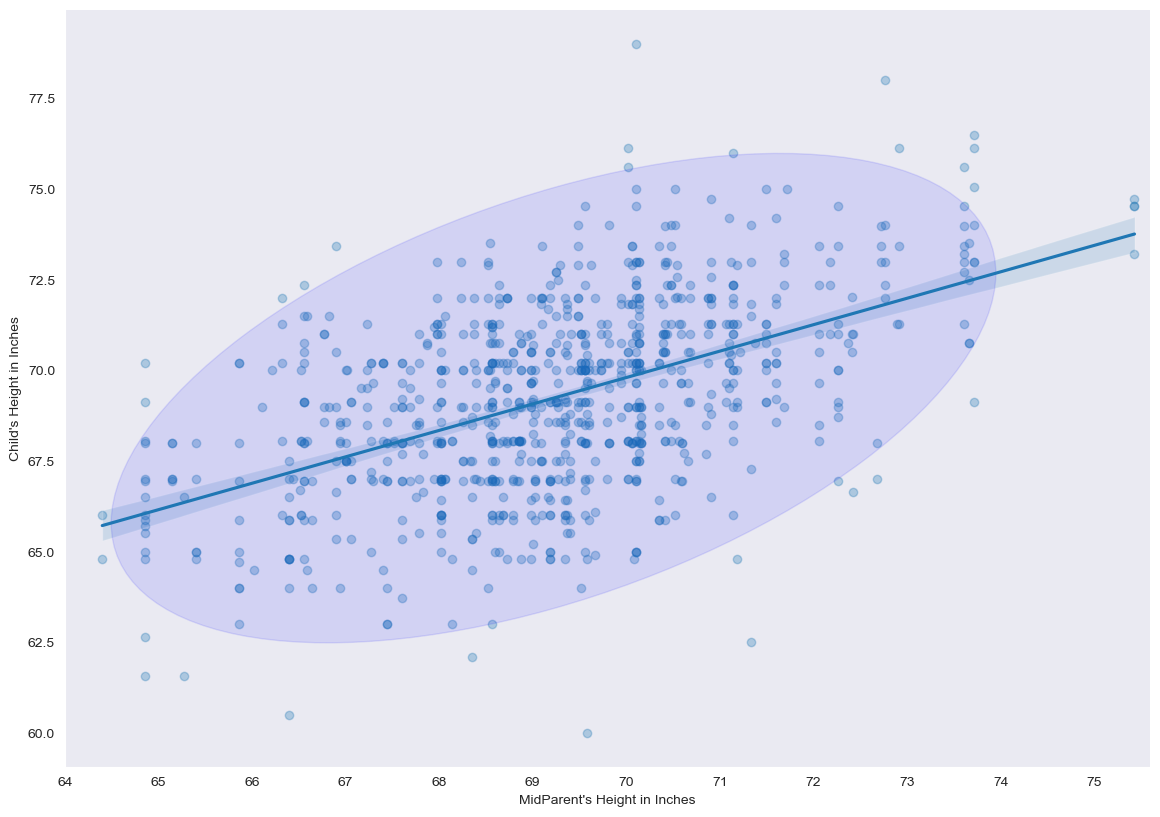

In [6]:
cov        = np.cov(df.X, df.Y)
lambda_, v = np.linalg.eig(cov)
lambda_    = np.sqrt(lambda_)

#pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

ell = Ellipse(xy=(df.X.mean(), df.Y.mean()),
                  width=lambda_[0]*2.6*2, height=lambda_[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='b')


p0 = sns.lmplot(data = df, x = 'X', y = 'Y',
            scatter_kws={'alpha':0.3},
            height=8.27, aspect=11.7/8.27)

ax = p0.facet_axis(0,0)
ax.add_artist(ell)


plt.xlabel('MidParent\'s Height in Inches' )
plt.xlim(64.2,75.6)
plt.xticks(range(64,76))

plt.ylabel('Child\'s Height in Inches' )

In the following plot, the heights $Y_1$ and $Y_0$ of the daughters and sons are plotted versus the midparents’ heights $X$.

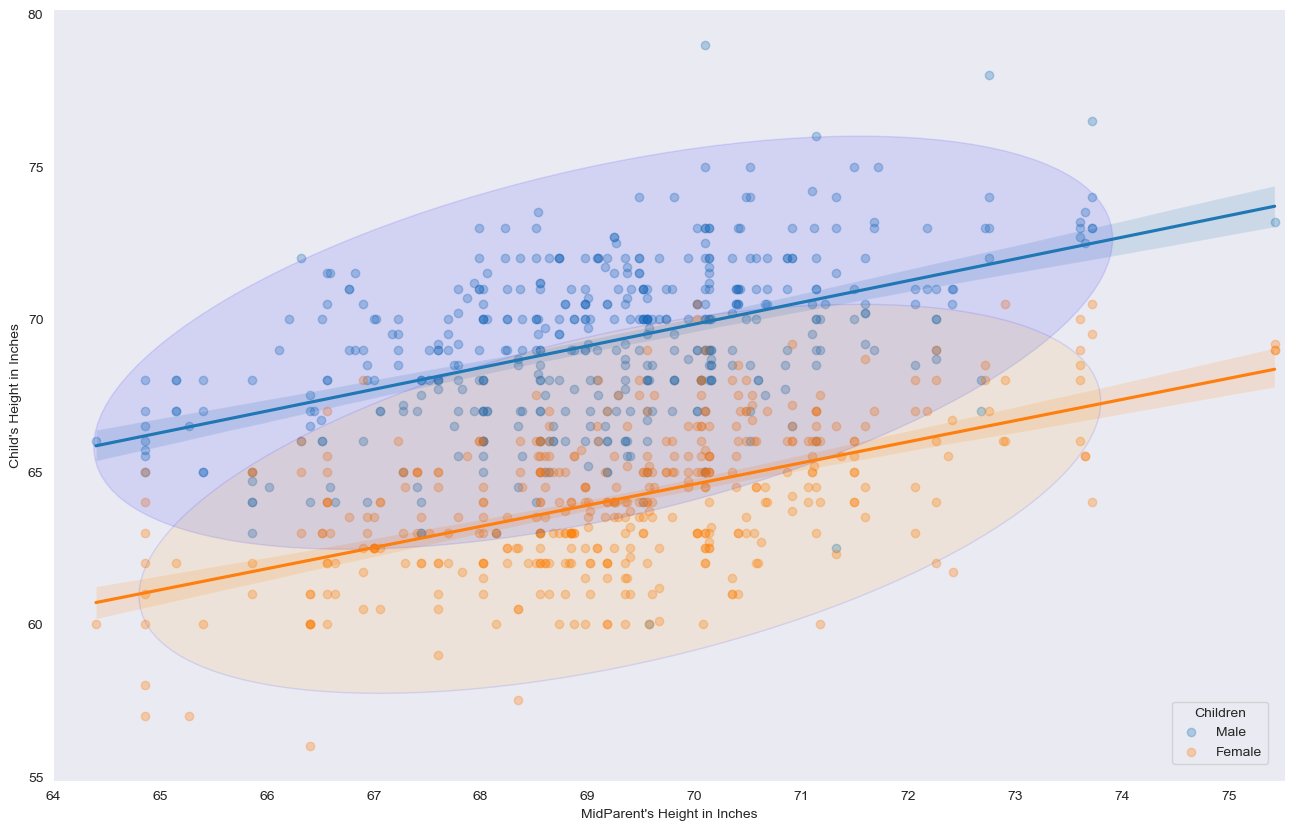

In [7]:
cov_0         = np.cov(df_0.X[df_0['Gender'] == 0], df_0.Height[df_0['Gender'] == 0])
cov_1         = np.cov(df_0.X[df_0['Gender'] == 1], df_0.Height[df_0['Gender'] == 1])
lambda_0, v_0 = np.linalg.eig(cov_0)
lambda_0      = np.sqrt(lambda_0)
lambda_1, v_1 = np.linalg.eig(cov_1)
lambda_1      = np.sqrt(lambda_1)
 

ell_0 = Ellipse(xy=(df_0.X[df_0['Gender'] == 0].mean(), df_0.Height[df_0['Gender'] == 0].mean()),
                  width=lambda_0[0]*2.6*2, height=lambda_0[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='b')

ell_1 = Ellipse(xy=(df_0.X[df_0['Gender'] == 1].mean(), df_0.Height[df_0['Gender'] == 1].mean()),
                  width=lambda_1[0]*2.6*2, height=lambda_1[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='orange')

p0 = sns.lmplot(data = df_0, x = 'X', y = 'Height',
                hue = 'Gender',
                scatter_kws={'alpha':0.3})

p0.fig.set_figwidth(16)
p0.fig.set_figheight(9)

ax = p0.facet_axis(0,0)
ax.add_artist(ell_0)
ax.add_artist(ell_1)


plt.xlabel('MidParent\'s Height in Inches' )
plt.xlim(df.X.min() - 0.01, df.X.max() + 0.1)
plt.xticks(range(64,76))
plt.ylabel('Child\'s Height in Inches' )


# legend title
new_title = 'Children'
p0._legend.set_title(new_title)

# replace labels in legend
new_labels = ['Male', 'Female']
for t, l in zip(p0._legend.texts, new_labels):
    t.set_text(l)
    
sns.move_legend(p0, "lower right", frameon=True, bbox_to_anchor=(.88, .12))

In the next plot, where the daughters’ heights have been adjusted up, showing the two covering ellipses practically identical, as well as the two regression lines almost indistinguishable.

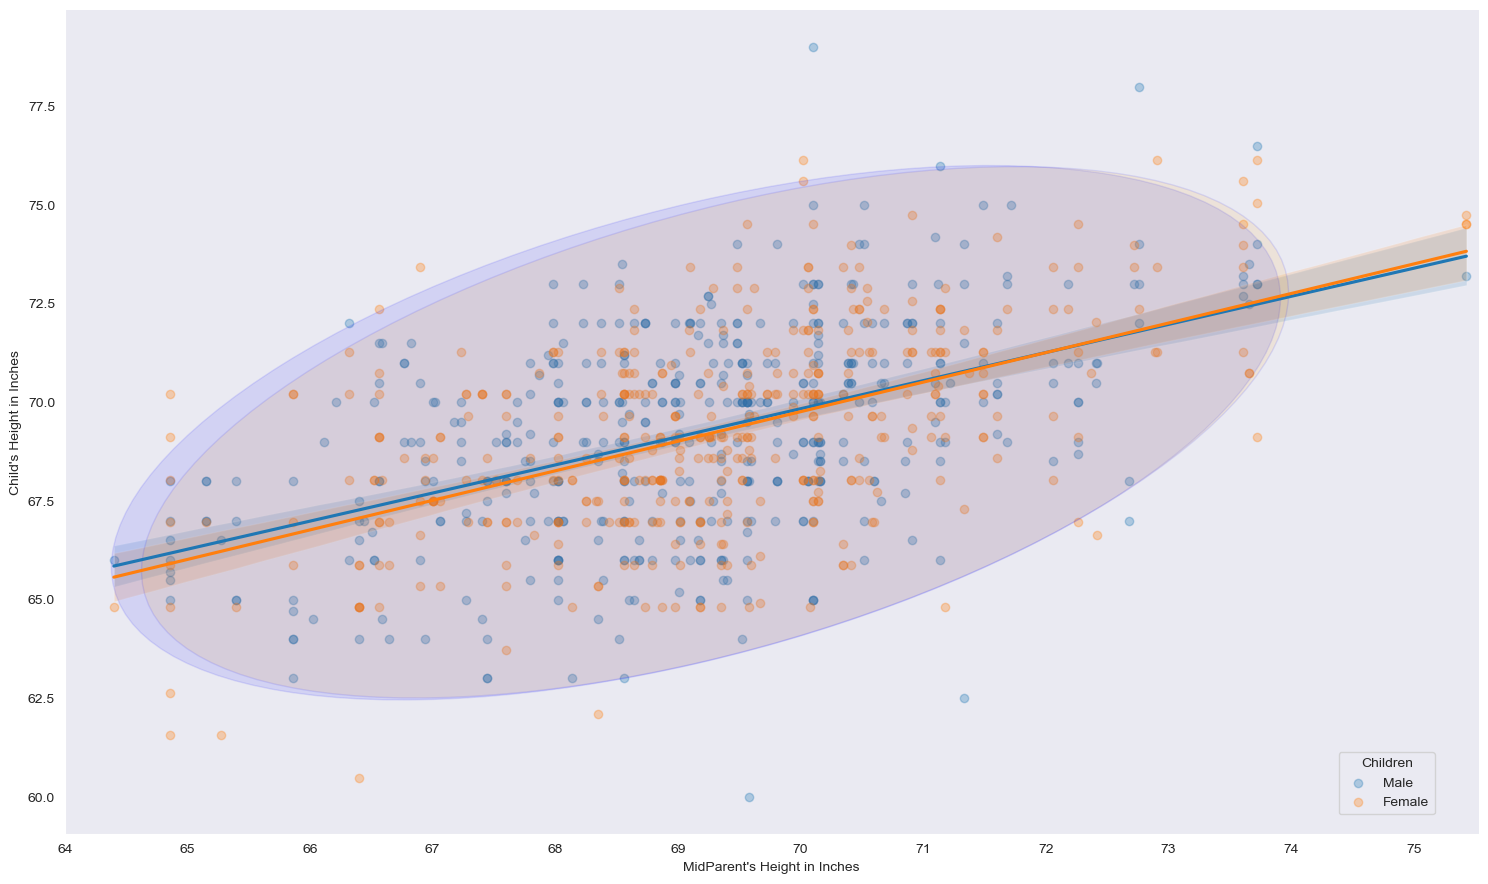

In [8]:
cov_0         = np.cov(df_0.X[df_0['Gender'] == 0], df_0.Y[df_0['Gender'] == 0])
cov_1         = np.cov(df_0.X[df_0['Gender'] == 1], df_0.Y[df_0['Gender'] == 1])
lambda_0, v_0 = np.linalg.eig(cov_0)
lambda_0      = np.sqrt(lambda_0)
lambda_1, v_1 = np.linalg.eig(cov_1)
lambda_1      = np.sqrt(lambda_1)
 

ell_0 = Ellipse(xy=(df_0.X[df_0['Gender'] == 0].mean(), df_0.Y[df_0['Gender'] == 0].mean()),
                  width=lambda_0[0]*2.6*2, height=lambda_0[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='b')

ell_1 = Ellipse(xy=(df_0.X[df_0['Gender'] == 1].mean(), df_0.Y[df_0['Gender'] == 1].mean()),
                  width=lambda_1[0]*2.6*2, height=lambda_1[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='orange')

p0 = sns.lmplot(data = df_0, x = 'X', y = 'Y',
                hue = 'Gender',
                scatter_kws={'alpha':0.3},
                height=8.27, aspect=11.7/8.27)

p0.fig.set_figwidth(16)
p0.fig.set_figheight(9)

ax = p0.facet_axis(0,0)
ax.add_artist(ell_0)
ax.add_artist(ell_1)

plt.xlabel('MidParent\'s Height in Inches' )
plt.xlim(df_0.X.min() - 0.01, df_0.X.max() + 0.1)
plt.xticks(range(64,76))
plt.ylabel('Child\'s Height in Inches' )

# legend title
new_title = 'Children'
p0._legend.set_title(new_title)

# replace labels in legend
new_labels = ['Male', 'Female']
for t, l in zip(p0._legend.texts, new_labels):
    t.set_text(l)
    
sns.move_legend(p0, "lower right", frameon=True, bbox_to_anchor=(.92, .08))

The fact that Galton was dealing with two populations is clearly seen, and on the next plot the merging into one population
thanks to the 8% adjustment of the daughters’ heights is shown to be very successful. The actual computed slope of this
‘‘single population’’ data set is 0.713, hence a bit higher than 2/3, and the correlation coefficient is 0.497, very close to 1/2.

Separately, the correlation of daughters’ and midparents’ heights is 0.513, and the correlation of sons’ and midparents’
heights is 0.483.

In [9]:
# Correlation Coeficient for adjusted populations
# ( Very close to 0.497 and 0.5, since we have
#   a little bit of missing data that is expected )
np.corrcoef(df.X, df.Y)[1,0]

0.5105247079354154

In [10]:
# Correlation Coeficient for son's height to midparents' height
# ( Very close to 0.483, since ...)
np.corrcoef(df_0.X[df_0['Gender'] == 0], df_0.Y[df_0['Gender'] == 0])[1,0]

0.4855195495138459

In [11]:
# Correlation Coeficient for daughters's height to midparents' height
# ( Very close to 0.513, since ...)
np.corrcoef(df_0.X[df_0['Gender'] == 1], df_0.Y[df_0['Gender'] == 1])[1,0]

0.5386104209531967

Several years later Karl Pearson, with the bivariate normal distribution in mind, formulated the correlation coefficient
in its familiar form in terms of the covariance and two variances and conducted his own study of
parent–child relationship in heights, using different data, obtaining an estimated slope of 0.52 and a correlation of
0.51.

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('Y ~ X', data=df).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     315.9
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           9.22e-61
Time:                        22:07:18   Log-Likelihood:                -1994.7
No. Observations:                 898   AIC:                             3993.
Df Residuals:                     896   BIC:                             4003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.7670      2.841      6.607      0.0

The fact that the slope was less than one led Galton to write his paper ‘‘Regression towards mediocrity in hereditary
stature’’, from which the term regression originates. The regression model predicted, for example, that taller-thanaverage
parents would have taller-than-average children, but whose heights were closer to the mean than their parents,
i.e., there was a ‘‘regression to the mean’’.

### From correlation to multiple correlation

Whereas the Pearson correlation takes on values between −1 and 1, with 0 indicating absence of correlation, its
square, conventionally denoted by $R^2$, the coefficient of determination, does lie between 0 and 1, indicating the strength of
association. $R^2$ is also said to measure the proportion of variance in Y explained by X and vice versa, which is a symmetric
concept in this simple bivariate case. 

The correlation was estimated as 0.497, which corresponds to an $R^2$ of 0.247, hence almost a quarter of the children’s variance is explained by midparents’ height and, equivalently, almost a quarter of midparents’ variance is explained by children’s height

In [13]:
## R^2 for our dataset, implying tha a little more
## than a quarter of the children's variance
## is explained by midparents' height
np.corrcoef(df.X, df.Y)[1,0]**2

0.26063547741254117

Next Figures show relationships and regression lines with respect to mothers’ and fathers’ heights separately, first for all children (incorporating the adjusted daughters’ heights to make one population), and then for daughters (unadjusted)
and sons separately. Attention is now turned for relating the children’s heights to the heights of the mother and the
father as separate variables, not combined as midparents.

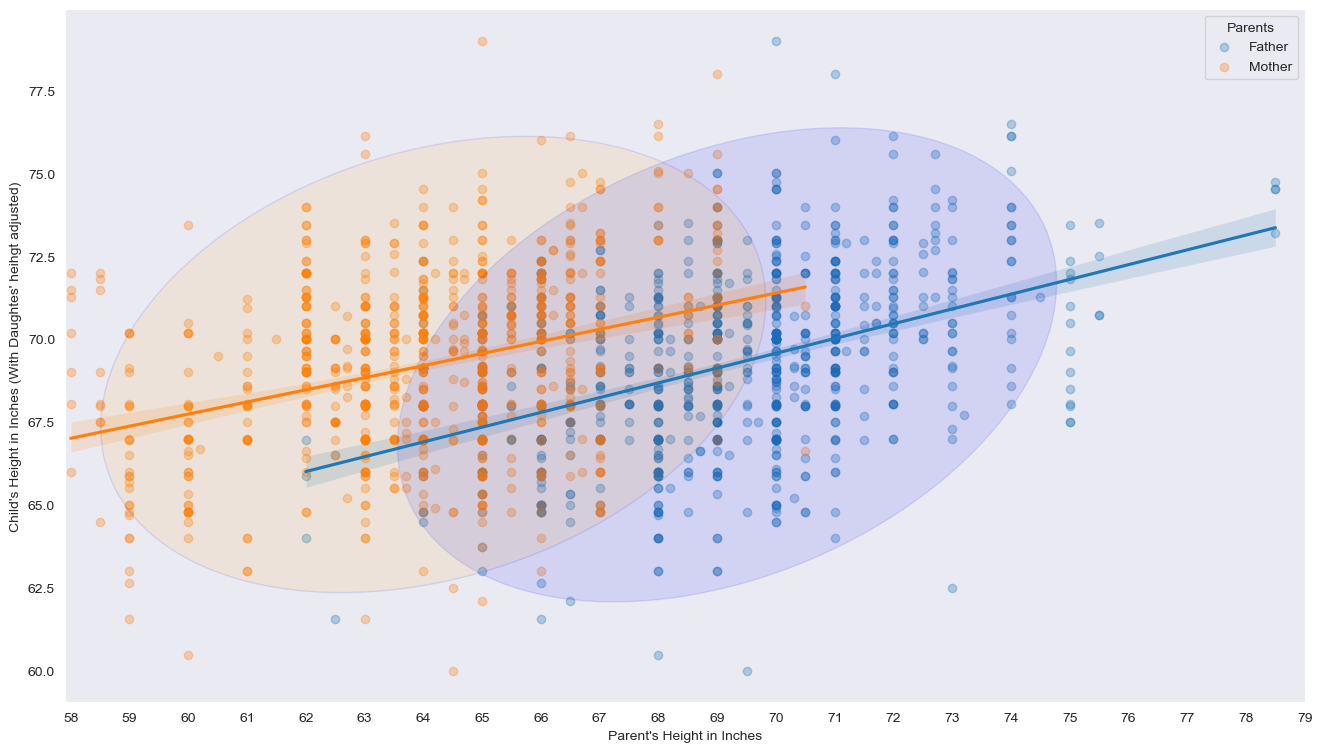

In [14]:
cov_0         = np.cov(df_0.Father[df_0['Gender'] == 0], df_0.Y[df_0['Gender'] == 0])
cov_1         = np.cov(df_0.Mother[df_0['Gender'] == 1], df_0.Y[df_0['Gender'] == 1])
lambda_0, v_0 = np.linalg.eig(cov_0)
lambda_0      = np.sqrt(lambda_0)
lambda_1, v_1 = np.linalg.eig(cov_1)
lambda_1      = np.sqrt(lambda_1)
 

ell_0 = Ellipse(xy=(df_0.Father[df_0['Gender'] == 0].mean(), df_0.Y[df_0['Gender'] == 0].mean()),
                  width=lambda_0[0]*2.6*2, height=lambda_0[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='b')

ell_1 = Ellipse(xy=(df_0.Mother[df_0['Gender'] == 1].mean(), df_0.Y[df_0['Gender'] == 1].mean()),
                  width=lambda_1[0]*2.6*2, height=lambda_1[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='orange')



fig, ax = plt.subplots(1,1, figsize=(16,9))


sns.regplot(data = df_0, x = 'Father', y = 'Y',
            scatter_kws={'alpha':0.3},
            label='Father')

sns.regplot(data = df_0, x = 'Mother', y = 'Y',
            scatter_kws={'alpha':0.3},
            label='Mother')


ax.add_artist(ell_0)
ax.add_artist(ell_1)

plt.xlabel('Parent\'s Height in Inches' )
plt.xlim(df_0.Mother.min() - 0.1, df_0.Father.max() + 0.1)
plt.xticks(range(58, 80))
plt.ylabel('Child\'s Height in Inches (With Daughtes\' heihgt adjusted)' )
plt.legend(title='Parents')

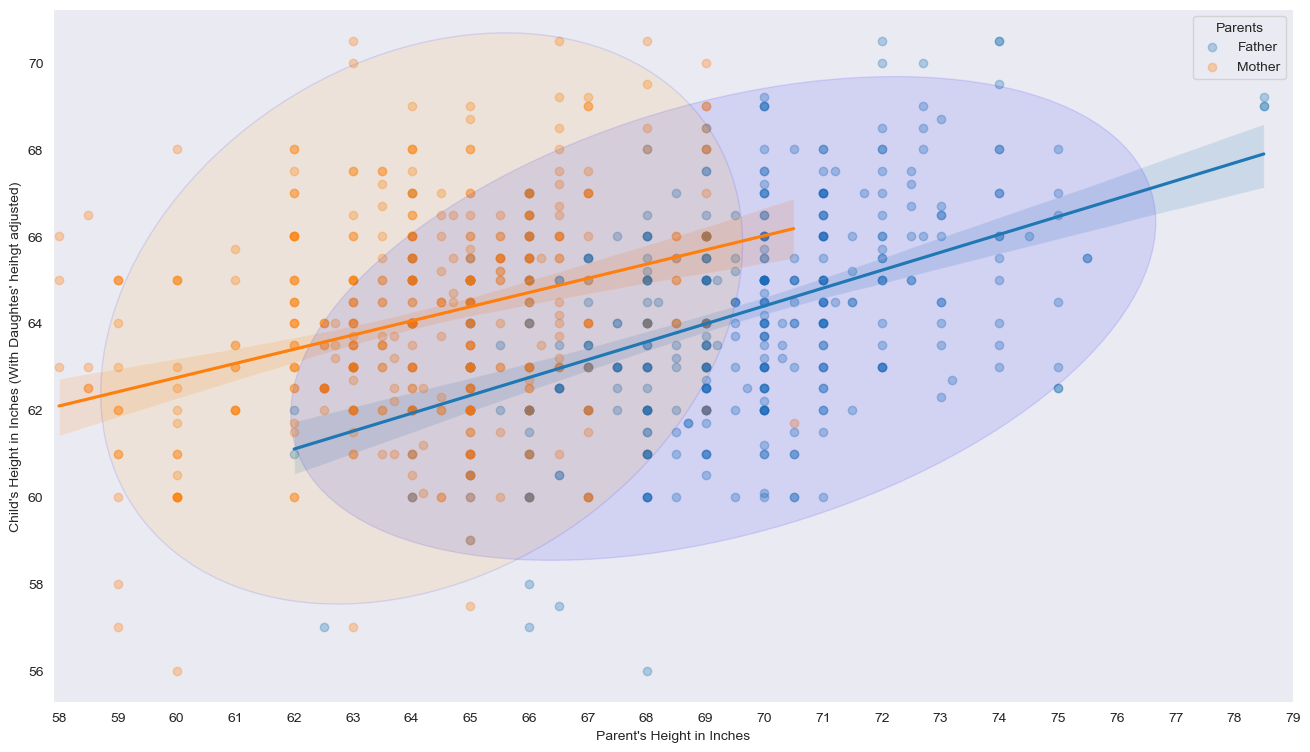

In [15]:
cov_0         = np.cov(df_0.Father[df_0['Gender'] == 1], df_0.Height[df_0['Gender'] == 1])
cov_1         = np.cov(df_0.Mother[df_0['Gender'] == 1], df_0.Height[df_0['Gender'] == 1])
lambda_0, v_0 = np.linalg.eig(cov_0)
lambda_0      = np.sqrt(lambda_0)
lambda_1, v_1 = np.linalg.eig(cov_1)
lambda_1      = np.sqrt(lambda_1)
 

ell_0 = Ellipse(xy=(df_0.Father[df_0['Gender'] == 1].mean(), df_0.Height[df_0['Gender'] == 1].mean()),
                  width=lambda_0[0]*2.6*2, height=lambda_0[1]*2*2.6,
                  angle=-np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='b')

ell_1 = Ellipse(xy=(df_0.Mother[df_0['Gender'] == 1].mean(), df_0.Height[df_0['Gender'] == 1].mean()),
                  width=lambda_1[0]*2.6*2, height=lambda_1[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='orange')



fig, ax = plt.subplots(1,1, figsize=(16,9))


sns.regplot(data = df_0[df_0.Gender == 1], x = 'Father', y = 'Height',
            scatter_kws={'alpha':0.3},
            label='Father')

sns.regplot(data = df_0[df_0.Gender == 1], x = 'Mother', y = 'Height',
            scatter_kws={'alpha':0.3},
            label='Mother')


ax.add_artist(ell_0)
ax.add_artist(ell_1)

plt.xlabel('Parent\'s Height in Inches' )
plt.xlim(df_0.Mother.min() - 0.1, df_0.Father.max() + 0.1)
plt.xticks(range(58, 80))
plt.ylabel('Child\'s Height in Inches (With Daughtes\' heihgt adjusted)' )
plt.legend(title='Parents')

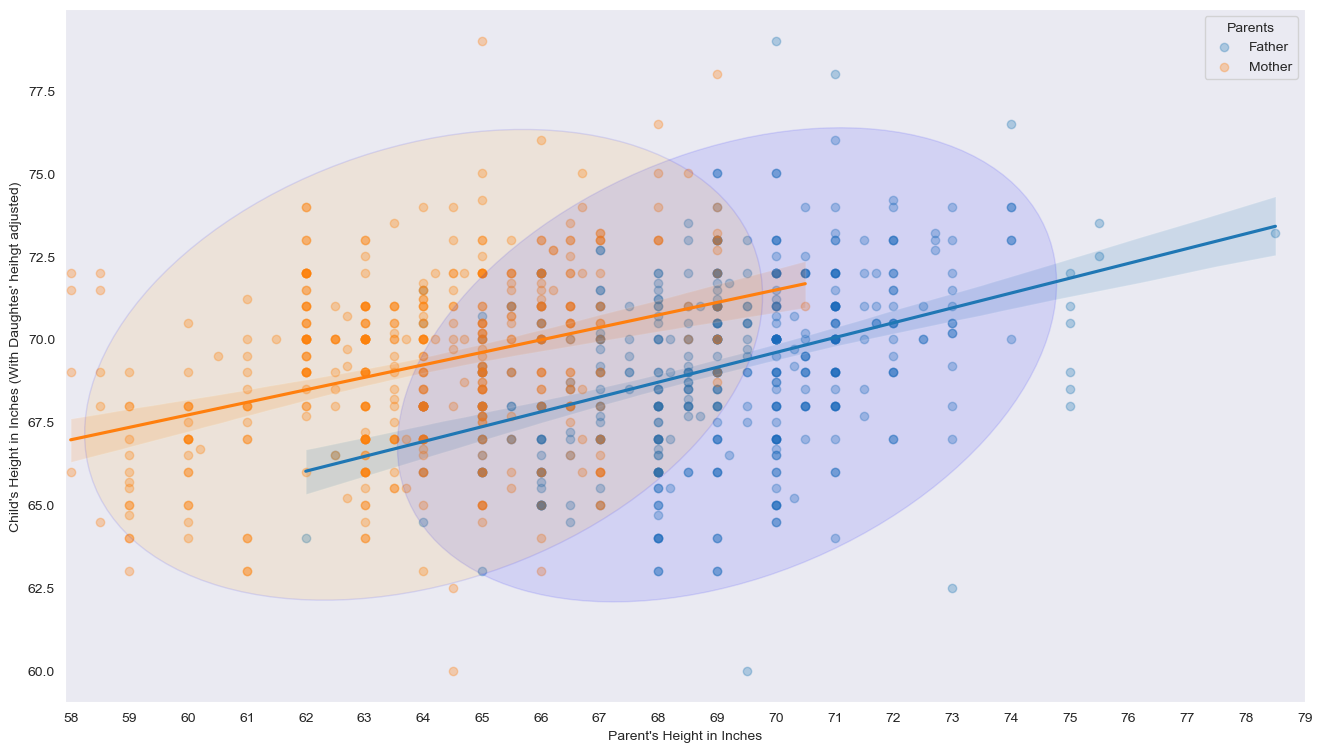

In [16]:
cov_0         = np.cov(df_0.Father[df_0['Gender'] == 0], df_0.Height[df_0['Gender'] == 0])
cov_1         = np.cov(df_0.Mother[df_0['Gender'] == 0], df_0.Height[df_0['Gender'] == 0])
lambda_0, v_0 = np.linalg.eig(cov_0)
lambda_0      = np.sqrt(lambda_0)
lambda_1, v_1 = np.linalg.eig(cov_1)
lambda_1      = np.sqrt(lambda_1)
 

ell_0 = Ellipse(xy=(df_0.Father[df_0['Gender'] == 0].mean(), df_0.Height[df_0['Gender'] == 0].mean()),
                  width=lambda_0[0]*2.6*2, height=lambda_0[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='b')

ell_1 = Ellipse(xy=(df_0.Mother[df_0['Gender'] == 0].mean(), df_0.Height[df_0['Gender'] == 0].mean()),
                  width=lambda_1[0]*2.6*2, height=lambda_1[1]*2*2.6,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='b', alpha = 0.1, facecolor='orange')



fig, ax = plt.subplots(1,1, figsize=(16,9))


sns.regplot(data = df_0[df_0.Gender == 0], x = 'Father', y = 'Height',
            scatter_kws={'alpha':0.3},
            label='Father')

sns.regplot(data = df_0[df_0.Gender == 0], x = 'Mother', y = 'Height',
            scatter_kws={'alpha':0.3},
            label='Mother')


ax.add_artist(ell_0)
ax.add_artist(ell_1)

plt.xlabel('Parent\'s Height in Inches' )
plt.xlim(df_0.Mother.min() - 0.1, df_0.Father.max() + 0.1)
plt.xticks(range(58, 80))
plt.ylabel('Child\'s Height in Inches (With Daughtes\' heihgt adjusted)' )
plt.legend(title='Parents')

When the relationship between one variable $Y$ and a set of variables $X_1, X_2, \ldots , X_p$ is to be measured, then the multiple correlation $R$ is defined as the maximum correlation between $Y$ and a linear combination of the $X_j$: $b_0 + \sum_j b_j X_j$ which can be solved in a matrix formulation
$$ R^2 = r^T R^{-1} r,$$
where $r$ is a vector of dimension $p \times 1$ of correlations $r_{X_1, Y}, \ldots, r_{X_p, Y}$, and $R$ is a matrix of correlations with elements $r_{X_j, X_k}$. Thus, $R^2$ is once again called the coefficient of determination in regression, measuring now the proportion of variance of the variable $Y$ explained by the $X$ variables.

In [17]:
X_for_Corr = df_0[['Mother', 'Father']].to_numpy().T
Y_for_Corr = df_0[['T Height']].to_numpy().T

Using all the children’s heights, where the daughters’ heights are adjusted up, the results are as follows:

In [18]:
r = np.corrcoef(x=X_for_Corr,  y=Y_for_Corr)[0:2, 2]
r

array([0.32440954, 0.42413624])

In [19]:
R = np.corrcoef(X_for_Corr)
R

array([[1.        , 0.07366461],
       [0.07366461, 1.        ]])

In [20]:
R_2 = np.matmul(np.matmul(r, inv(R)), r)
R_2**0.5

0.5160490349233291

Now a separate Analysis for sons and daughters.

In [21]:
# Sons
X_Sons_for_Corr = df_0[['Mother', 'Father']][df_0['Gender'] == 0].to_numpy().T
Y_Sons_for_Corr = df_0[['T Height']][df_0['Gender'] == 0].to_numpy().T

r_Sons = np.corrcoef(x=X_Sons_for_Corr,  y=Y_Sons_for_Corr)[0:2, 2]
R_Sons = np.corrcoef(X_Sons_for_Corr)
R2_Sons = np.matmul(np.matmul(r_Sons, inv(R_Sons)), r_Sons)
R2_Sons**0.5

0.4895671578677686

In [22]:
# Daughters
X_Daughters_for_Corr = df_0[['Mother', 'Father']][df_0['Gender'] == 1].to_numpy().T
Y_Daughters_for_Corr = df_0[['T Height']][df_0['Gender'] == 1].to_numpy().T


r_Daughters = np.corrcoef(x=X_Daughters_for_Corr,  y=Y_Daughters_for_Corr)[0:2, 2]
R_Daughters = np.corrcoef(X_Daughters_for_Corr)
R2_Daughters = np.matmul(np.matmul(r_Daughters, inv(R_Daughters)), r_Daughters)
R2_Daughters**0.5

0.54547946441485

So, our $R^2$ is 0.2663. Notice that $R^22$ is now not a symmetric concept of explained variance. It is the variance of $Y$ explained by the $X$’s but not the variance of the $X$’s explained by $Y$.

### 2.3 The whole can be greater than the sum of its parts

If there is no correlation amongst the $X$-variables, then 
$$ R^2 = r_1^2 + \cdots + r_p^2, where $r_j$ is $r_{x_j y}$, $j = 1,\ldots,p$. In general, the X-variables are intercorrelated, and thus one would expect that
$$ R^2 < r_1^2 + \cdots + r_p2,$$
which is generally the case seeing that there is no redundancy in the sum of squares but there is in R2. For example, in the previous examples there was a very low correlation between the heights of the parents, and so we would expect $R^2$  to be only slightly less than $r_1^2 + r_2^2$. The numerical results confirm this: for children together $R^2$ is

In [23]:
R_2

0.26630660644529935

and $r_1^2 + r_2^2$ is

In [24]:
(r**2).sum()

0.28513309366676504

for sons:

In [25]:
R2_Sons

0.23967600206272466

In [26]:
(r_Sons**2).sum() 

0.2647727348238592

and for daugthers:

In [27]:
R2_Daughters

0.29754784609831153

In [28]:
(r_Daughters**2).sum() 

0.30886787935078736

Nevertheless, there are situations when 
$$R^2 > r_1^2 + \cdots + r_p^2,$$
that is,
$$ R^2 = r^T R^{-1} r > r^T r.$$

Cuadras showed that if $\lambda_1, \ldots, \lambda_p$ are the eigenvalues of the correlation matrix $R$, and $r_{Z_j}$ denotes the correlation between $Y$ and the $j$th principal component $Z_j$, then $ R^2 = r^T R^{-1} r > r^T r$ is equivalent to
$$ \sum_{j=1}^{p} r_{Z_j}^2( 1 - \lambda_j ) > 0.$$
Seeing that the first eigenvalues of a correlation matrix are greater than 1 and the later ones less than 1, then $ \sum_{j=1}^{p} r_{Z_j}^2( 1 - \lambda_j ) > 0$
will be satisfied if $Y$ has a large correlation with the minor principal components. Hence, it is erroneous to believe that
correlated variables inherently contain redundancies

### 2.4. The ecological fallacy

Ecological inference is based on aggregating data (e.g., by averaging) and looking at relationships between variables
based on the aggregated values. Such a strategy can produce spurious correlations, called the ecological fallacy. The ecological fallacy is due to putting different populations together and computing a correlation.

The following Example uses data simulated from 2 sub-populations (Male and Female) to illustrate the problem of spurious correlations discovered by Karl Pearson while studying the longitude and amplitude of skulls. 

In [29]:
# Set Parameters
mu_length_F = 10
mu_breadth_F = 9
mu_length_M = 11
mu_breadth_M = 12

# Simulate Data
F_sample = mult_norm.rvs([mu_length_F, mu_breadth_F], size=50)
M_sample = mult_norm.rvs([mu_length_M, mu_breadth_M], size=50)
T_sample = np.concatenate([F_sample, M_sample])

Text(6, 15, '$\\hat{\\rho}$ = -0.0143')

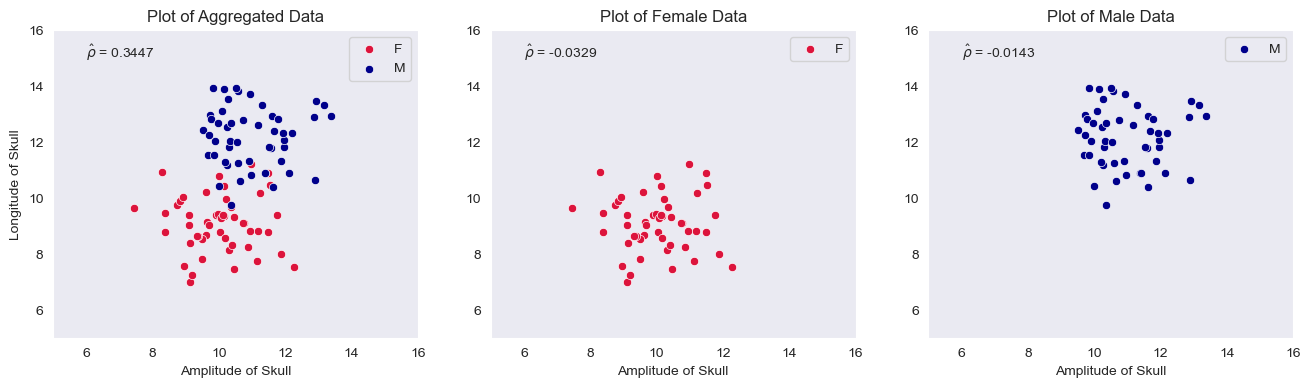

In [30]:
figs, axs = plt.subplots(1,3, figsize=(16,4))

sns.scatterplot(x=F_sample[:,0], y=F_sample[:,1], label='F', ax=axs[0], color='crimson')
sns.scatterplot(x=M_sample[:,0], y=M_sample[:,1], label='M', ax=axs[0], color='darkblue')

sns.scatterplot(x=F_sample[:,0], y=F_sample[:,1], label='F', ax=axs[1], color='crimson')
sns.scatterplot(x=M_sample[:,0], y=M_sample[:,1], label='M', ax=axs[2], color='darkblue')

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (5, 16)
custom_ylim = (5, 16)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, xlabel='Amplitude of Skull')


axs[0].set_ylabel('Longitude of Skull')
axs[0].title.set_text('Plot of Aggregated Data')
axs[1].title.set_text('Plot of Female Data')
axs[2].title.set_text('Plot of Male Data')

axs[0].text(6, 15, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=T_sample[:,0], y=T_sample[:,1])[0],4) ))
axs[1].text(6, 15, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=F_sample[:,0], y=F_sample[:,1])[0],4) ))
axs[2].text(6, 15, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=M_sample[:,0], y=M_sample[:,1])[0],4) ))

This is a spurious correlation because the Aggregated dataset shows a positive correlation that is not in any of the sub-populations.

Now, the next example shows us a case where the correlation for the population gets inverted for the sub-populations. This is a simple example of Simpson's paradox. Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined.

In [31]:
x_F_correlated = np.linspace(5,10,5)
y_F_correlated = 15-x_F_correlated

x_M_correlated = np.linspace(15,20,5) 
y_M_correlated = 35-x_M_correlated

x_T_correlated = np.concatenate([x_F_correlated, x_M_correlated])
y_T_correlated = np.concatenate([y_F_correlated, y_M_correlated])

Text(0.5, 1.0, "Simple Example of Simpson's Paradox")

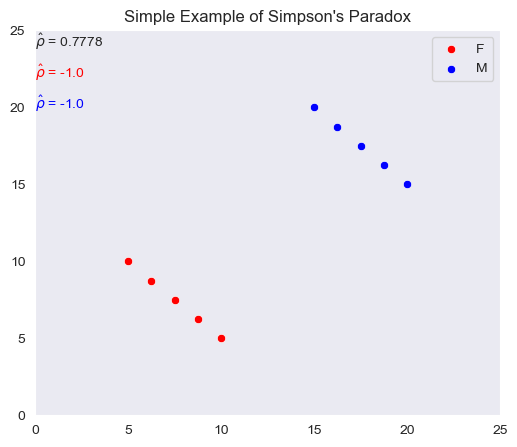

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sns.scatterplot(x=x_F_correlated, y=y_F_correlated, label='F', ax=ax, color='red')
sns.scatterplot(x=x_M_correlated, y=y_M_correlated, label='M', ax=ax, color='blue')

plt.xlim(0,25)
plt.ylim(0,25)

ax.text(0, 23.9, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_T_correlated, y=y_T_correlated)[0],4) ))
ax.text(0, 19.9, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_M_correlated, y=y_M_correlated)[0],4) ), color='blue')
ax.text(0, 21.9, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_F_correlated, y=y_F_correlated)[0],4) ), color='red')

plt.title('Simple Example of Simpson\'s Paradox')

### Restriction of Observed Data Range

Another pitfall in the use of correlations is when we restrict the range of observations. Let us look at the effect of restricting the range of observations for one of the variables.

In [33]:
mu_restricted    = np.array([0, 0])
Sigma_restricted = np.array([[1.2,0.8],[0.8,1.2]])
sample_nonrestricted = mult_norm.rvs(mu_restricted, Sigma_restricted, size=50)
sample_restricted = sample_nonrestricted[(abs(sample_nonrestricted[:,0]) < 0.5)]
x_restricted_ = np.linspace(-0.5, 0.5, 100)

(-3.5, 3.5)

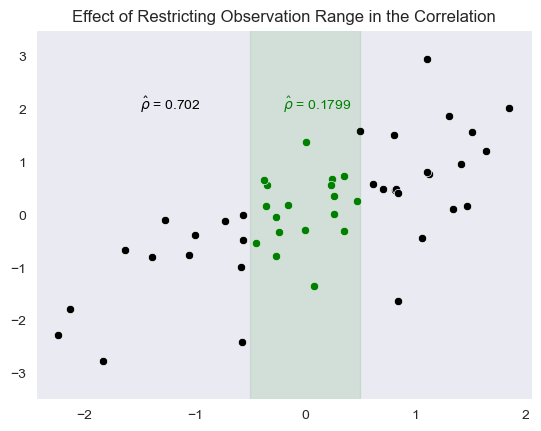

In [34]:
sns.scatterplot(x=sample_nonrestricted[:,0], y=sample_nonrestricted[:,1], color='k')
sns.scatterplot(x=sample_restricted[:,0], y=sample_restricted[:,1]      , color='g')


plt.text(-1.5, 2, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=sample_nonrestricted[:,0], y=sample_nonrestricted[:,1])[0],4)),
         color='k')
plt.text(-0.2, 2  , r'$\hat{\rho}$ = ' + str(round(pearsonr(x=sample_restricted[:,0], y=sample_restricted[:,1])[0],4) ),
         color='g')

plt.fill_between(x_restricted_, np.repeat(-3.5, 100), np.repeat(3.5, 100), color='green', alpha=0.1)


plt.title('Effect of Restricting Observation Range in the Correlation')
plt.ylim(-3.5, 3.5)

We can see that when we reduce the variation, the correlation coefficient gets affected even though the relationship stays the same. Usually, the correlation computed for the restricted sample goes to 0. But the point is that we should not conclude anything from a restricted sample, we should use the full data when available (assuming there is no outliers which will also affect the inference process). 

### Error of Measurement

One more pitfall in the use of correlation comes about when the sample contains a mesurement error. Let us simulate some data with a perfect relationship and induce some measurement error to illustrate how the correlation behaves.

In [35]:
x_A_Effective_measurement = np.linspace(0, 10, 10)
y_A_measurement           = 20+3*x_A_Effective_measurement

x_B_Effective_measurement = np.linspace(10, 20, 10)
y_B_measurement           = 20+3*x_B_Effective_measurement

x_A_Formal_measurement    = x_A_Effective_measurement + norm.rvs(loc= 5, scale=2, size=x_A_Effective_measurement.shape[0])
x_B_Formal_measurement    = x_B_Effective_measurement + norm.rvs(loc=-5, scale=2, size=x_B_Effective_measurement.shape[0])



x_T_Effective_measurement = np.concatenate([x_A_Effective_measurement, x_B_Effective_measurement])
x_T_Formal_measurement    = np.concatenate([x_A_Formal_measurement,    x_B_Formal_measurement])
y_T_measurement           = np.concatenate([y_A_measurement, y_B_measurement])

First, we have our perfect linear relationship.

Text(0.5, 1.0, 'Perfect Linear Relationship with no Measurement Error')

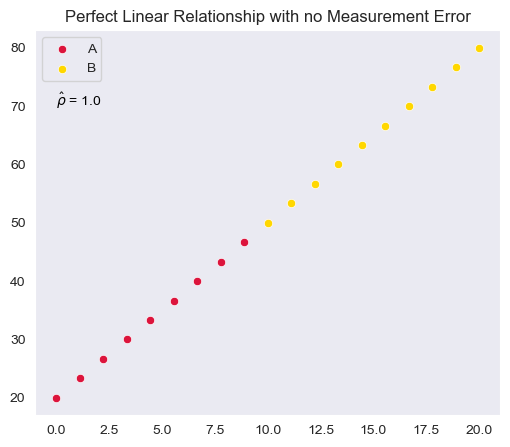

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sns.scatterplot(x=x_A_Effective_measurement, y=y_A_measurement, ax=ax, label='A', color='crimson')
sns.scatterplot(x=x_B_Effective_measurement, y=y_B_measurement, ax=ax, label='B', color='gold')

plt.text(0, 70, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_T_Effective_measurement, y=y_T_measurement)[0],4)),
         color='k')

plt.title('Perfect Linear Relationship with no Measurement Error')

And the sample with measurement error.

Text(0.5, 1.0, 'Perfect Linear Relationship with Measurement Error')

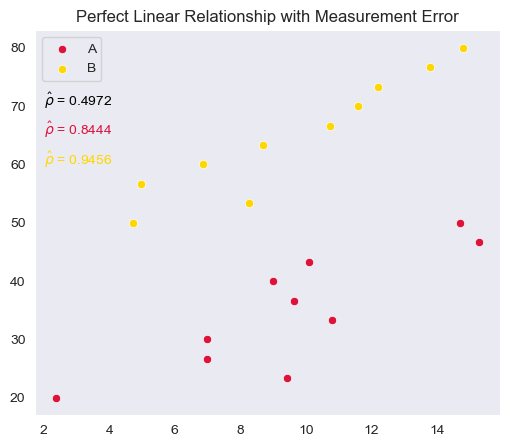

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))
sns.scatterplot(x=x_A_Formal_measurement, y=y_A_measurement, ax=ax, label='A', color='crimson')
sns.scatterplot(x=x_B_Formal_measurement, y=y_B_measurement, ax=ax, label='B', color='gold')

plt.text(2, 70, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_T_Formal_measurement, y=y_T_measurement)[0],4)),
         color='k')

plt.text(2, 65, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_A_Formal_measurement, y=y_A_measurement)[0],4)),
         color='crimson')

plt.text(2, 60, r'$\hat{\rho}$ = ' + str(round(pearsonr(x=x_B_Formal_measurement, y=y_B_measurement)[0],4)),
         color='gold')

plt.title('Perfect Linear Relationship with Measurement Error')

Now it looks as if we have 2 different effects. Even though they are the same!

### Conclusion

I'll close this exercise with a quote from David Cox:

*"A statistical inference carries us from observations to conclusions about the populations sampled. A scientific inference in the broader sense is usually concerned with arguing from descriptive facts about populations to some deeper understanding of the system under investigation. Of course, the more the statistical inference helps us with this latter process, the better"*

And a quote from Ronald Fisher:

*"If we choose a group of social phenomena with no antecent knowledge of the causation or absence of causation among the variables, then the calculation of correlation coefficients, total or partial, will not advance us a step forward towards evaluationg the importance of the causes at work.*

That is science is more important than mere blind computation of statistics. We should always have a deeper understanding of the phenomena we wish to study.